# Create embeddings

In [1]:
# With OPTS
# !python src/main.py --input graph/barbell.edgelist --output emb/barbell.emb --num-walks 20 --walk-length 80 \
#     --window-size 5 --dimensions 2 --OPT1 True --OPT2 True --OPT3 True --until-layer 6
!python src/main.py --input graph/barbell.edgelist --output emb/barbell.emb --num-walks 20 --walk-length 80 \
    --window-size 5 --dimensions 2 --until-layer 6

In [2]:
import gensim
import networkx as nx
from src import utils

di_graph, colors = utils.load_graph_and_colors(
    file_graph='graph/barbell.edgelist', file_colors='graph/barbell.colors', directed=True)

model = gensim.models.KeyedVectors.load_word2vec_format('emb/barbell.emb')

nodes = di_graph.nodes()

pos = {}
for i, node in enumerate(model.index2word):
    pos[int(node)] = model.vectors[i, :]
    
node_color = [colors[int(node)] for node in nodes]

# Plot graphs

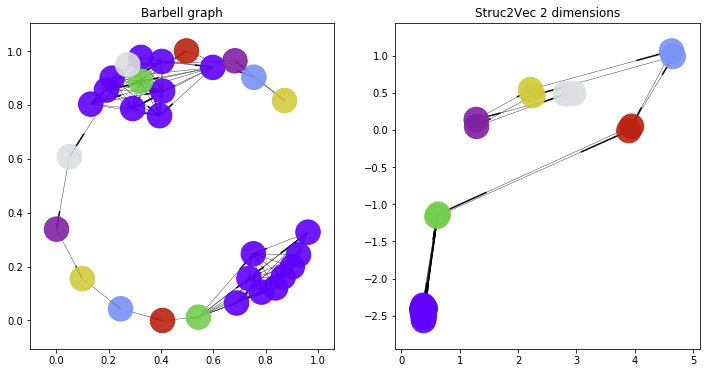

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 6), ncols=2)

ax[0].set_title('Barbell graph')
nx.draw_networkx(G=di_graph, nodes=nodes, node_size=600, with_labels=False, width=0.4,
                 alpha=0.9, node_color=node_color, ax=ax[0])

ax[1].set_title('Struc2Vec 2 dimensions')
nx.draw_networkx(G=di_graph, pos=pos, nodes=nodes, node_color=node_color, width=0.4,
                 node_size=600, arrows=True, with_labels=False, alpha=0.9, ax=ax[1])